# Data Analysis Interview Challenge

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

Imports

In [8]:
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize

In [9]:
with open('logins.json') as f:
    data = json.load(f)

In [161]:
df_logins = pd.read_json('logins.json')
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [153]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


The logins data is detailed down to the second, convert to minutes

In [165]:
df_logins['login_time']= df_logins['login_time'].values.astype('datetime64[m]')

In [166]:
df_logins.head(6)

,login_time
0,1970-01-01 20:13:00
1,1970-01-01 20:16:00
2,1970-01-01 20:16:00
3,1970-01-01 20:16:00
4,1970-01-01 20:26:00
5,1970-01-01 20:21:00


The login values are not sorted, so we need to sort them to use them as an index 

In [232]:
df_logins = df_logins.sort_values('login_time').reset_index(drop=True)
df_logins.head(5)

,login_time
0,1970-01-01 20:12:00
1,1970-01-01 20:13:00
2,1970-01-01 20:16:00
3,1970-01-01 20:16:00
4,1970-01-01 20:16:00


Get the start and end time periods of the original logins dataset

In [179]:
#first login
df_logins.iloc[0][0]

Timestamp('1970-01-01 20:12:00')

In [183]:
#last login
df_logins.iloc[-1][0]

Timestamp('1970-04-13 18:57:00')

Using date range create a series of time stamps of 15 minute windows

In [136]:
#create a time series date range @ 15 minute intervals to map our logins into
login_15m = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
print(login_15m [ :5])

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00'],
              dtype='datetime64[ns]', freq='15T')


Create 0 values for a counter for each 15 min group

In [225]:
# create a series of 0 values using the 15 min intervals as the index
# also use this to reset the values of the series when testing for loop below 
count_15m = pd.Series(np.zeros(len(login_15m)), index=login_15m)
count_15m.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [ ]:
p = 0 
for i in range(len(login_df)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = login_df['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

Iterate through the time sorted series

In [226]:
j=0
for i in range(len(df_logins)):
    if (count_15m.index[j] <= df_logins['login_time'][i] < count_15m.index[j+1]): #if time element i between bounds
        count_15m[j] = count_15m[j] + 1
    else: #else increase bound period
        j += 1 
        if (count_15m.index[j] <= df_logins['login_time'][i] < count_15m.index[j+1]): #if time elements of next bounds
            count_15m[j] = count_15m[j] + 1


Inspect series

In [227]:
count_15m.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

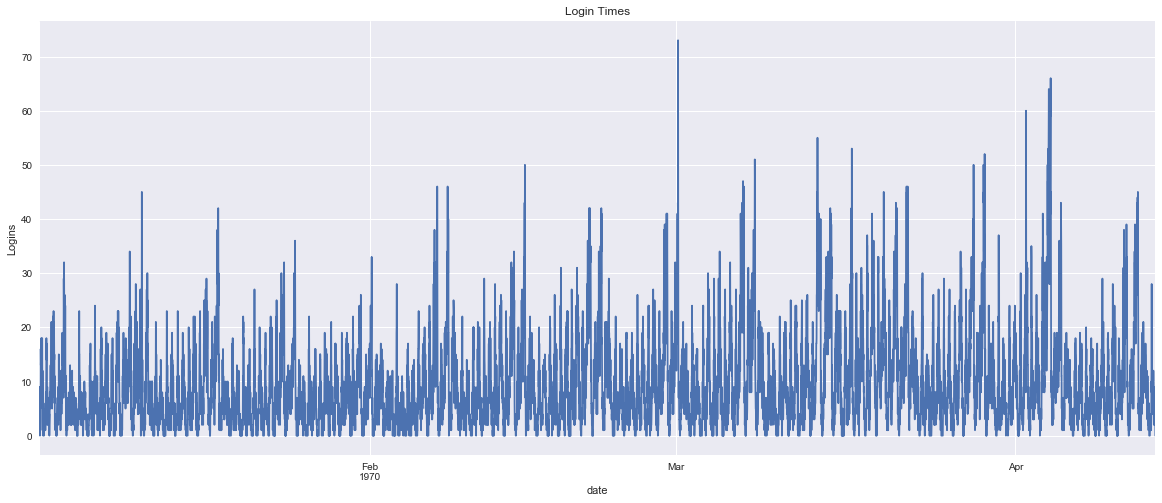

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
plt.xlabel('Date of Login')
plt.ylabel('Logins')
plt.title('Login Times')

count_15m.plot(figsize=(20,8));

Convert to dataframe

In [247]:
df_login = pd.DataFrame(count_15m)

Find max value

In [258]:
df_login.index.name = 'date'

In [261]:
df_login[df_login[0]==df_login[0].max()]

,0
date,
1970-03-01 04:30:00,73.0


In [266]:
df_login.describe()

,0
count,9789.000000
mean,9.447339
std,8.390622
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [267]:
df_date = df_login.reset_index()

In [279]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9789 entries, 0 to 9788
Data columns (total 3 columns):
date       9789 non-null datetime64[ns]
0          9789 non-null float64
weekday    9789 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 229.5+ KB


In [308]:
df_date.columns.values[1] = 'logins'

Add day of week column

In [274]:
import datetime

df_date['weekday'] = df_date['date'].apply(lambda x: x.strftime("%A"))

In [309]:
df_date.head()

,date,logins,weekday
0,1970-01-01 20:00:00,2.0,Thursday
1,1970-01-01 20:15:00,6.0,Thursday
2,1970-01-01 20:30:00,9.0,Thursday
3,1970-01-01 20:45:00,7.0,Thursday
4,1970-01-01 21:00:00,1.0,Thursday


In [311]:
df_date[df_date[0]>40].head(10)

,date,logins,weekday
899,1970-01-11 04:45:00,45.0,Sunday
1569,1970-01-18 04:15:00,42.0,Sunday
3490,1970-02-07 04:30:00,46.0,Saturday
3581,1970-02-08 03:15:00,46.0,Sunday
4256,1970-02-15 04:00:00,43.0,Sunday
4259,1970-02-15 04:45:00,50.0,Sunday
4821,1970-02-21 01:15:00,42.0,Saturday
4829,1970-02-21 03:15:00,42.0,Saturday
4929,1970-02-22 04:15:00,42.0,Sunday
4931,1970-02-22 04:45:00,41.0,Sunday


In [312]:
df_date.groupby('weekday')[0].agg([np.sum, np.mean, np.std])

,sum,mean,std
weekday,,,
Friday,15144.0,10.516667,8.216900
Monday,8707.0,6.127375,5.103157
Saturday,19330.0,13.423611,10.394498
Sunday,18131.0,12.590972,10.116901
Thursday,11829.0,8.697794,7.152126
Tuesday,9109.0,6.777530,6.360273
Wednesday,10230.0,7.611607,6.637921


In [391]:
df_date.groupby('weekday')['logins'].agg([np.sum])

,sum
weekday,
Friday,15144.0
Monday,8707.0
Saturday,19330.0
Sunday,18131.0
Thursday,11829.0
Tuesday,9109.0
Wednesday,10230.0


In [368]:
#Get the peak login time
df_date[df_date['logins']==73].head(10)

,index,date,logins,weekday
5602,5602,1970-03-01 04:30:00,73.0,Sunday


Inspect over a period of one month

In [384]:
from datetime import timedelta
df_4weeks = count_15m['1970-02-14 04:30:00':'1970-03-15 04:30:00']

In [385]:
df_4weeks.head()

date
1970-02-14 04:30:00    30.0
1970-02-14 04:45:00    34.0
1970-02-14 05:00:00    21.0
1970-02-14 05:15:00    23.0
1970-02-14 05:30:00    25.0
Freq: 15T, dtype: float64

The plot below shows the weekly cycle when logins exceed 40 per quarter hour

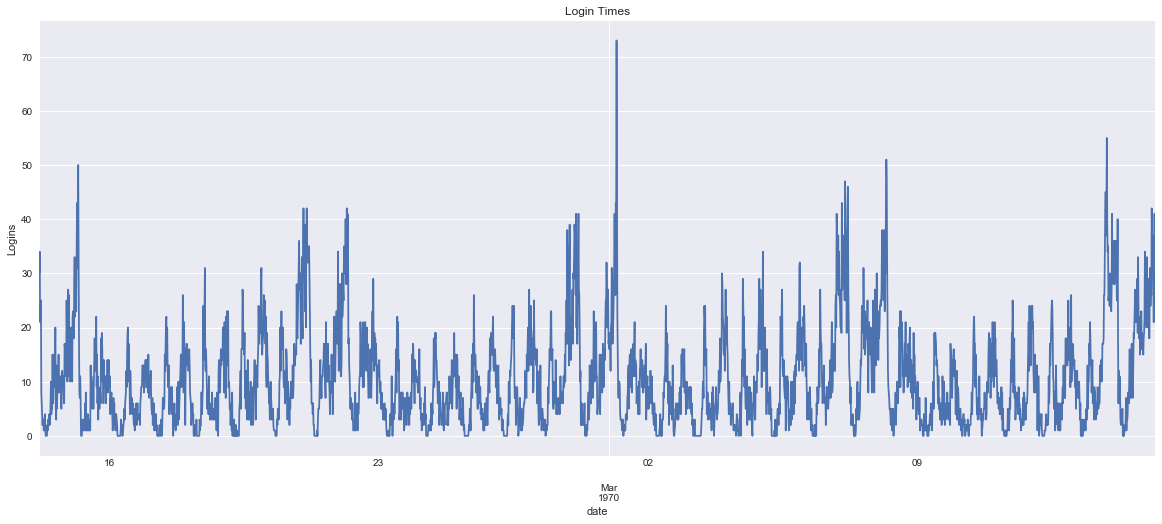

In [388]:
plt.xlabel('Date of Login')
plt.ylabel('Logins')
plt.title('Login Times')

df_4weeks.plot(figsize=(20,8));

## Part 2 ‑ Experiment and metrics design

### TOLL BRIDGE EXPERIMENT
#### Compensate drivers for non-ride toll costs

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

- What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

A key measure for success if Metropolis drivers login at night and cross the bridge to Gotham during the weekday, and the inverse for Gotham drivers to login during the weekday and cross into Metropolis. A metric would be to see an increase in the number of logins overall during the weekday.

- Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


I would identify which drivers in each city currently do not drive over before they start their shift during the weekdays. From the group that does not cross I split that 3 groups: 'Toll Compensation', Toll Compensation Plus','Control Group'. 

- The 'Control Group' does not get any changes to their rides.
- The 'Toll Compensation' group gets the toll paid promotion.
- The 'Toll Compensation Plus' gets the toll paid plus an additional fixed bonus.

To measure the effectiveness I would track over 3-4 full week the changes in login times and locations for the 3 groups.
I would used a t-test to compare the groups, and also track the return on investment from the two compensated groups from rides picked up and average passenger wait times. 

One caveat is that this might work better in one direction and not the other. Another is that too many drivers may force a premature end of shift as too many drivers may dilute the driver income.


---

## Part 3
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1.Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2.Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3.Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Driver Data

In [644]:
file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)
df=pd.DataFrame(data)

In [396]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [397]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [399]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [645]:
df_citystats= df[['city','avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct','trips_in_first_30_days','weekday_pct']]

In [426]:
df_citystats.head()

,city,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
0,King's Landing,3.67,5.0,4.7,1.10,15.4,4,46.2
1,Astapor,8.26,5.0,5.0,1.00,0.0,0,50.0
2,Astapor,0.77,5.0,4.3,1.00,0.0,3,100.0
3,King's Landing,2.36,4.9,4.6,1.14,20.0,9,80.0
4,Winterfell,3.13,4.9,4.4,1.19,11.8,14,82.4


Let's see who uses Ulitimate more in the 3 cities? Looks like Winterfell has many more than the other 2 cities.

In [440]:
df['city'].value_counts().head(20)

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

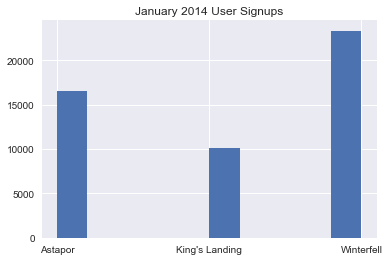

In [646]:
plt.title('January 2014 User Signups')
plt.hist(df['city']);

How do the drivers rate the passengers of each city?
Winterfell passenger ratings are lower

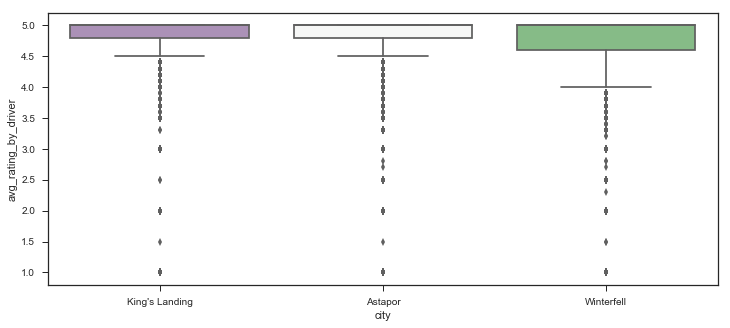

In [521]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.boxplot(y=df_citystats["avg_rating_by_driver"],x="city", data=df_citystats, palette="PRGn");

How do the passengers rate the drivers in each city?
Winterfell drivers' ratings are lower

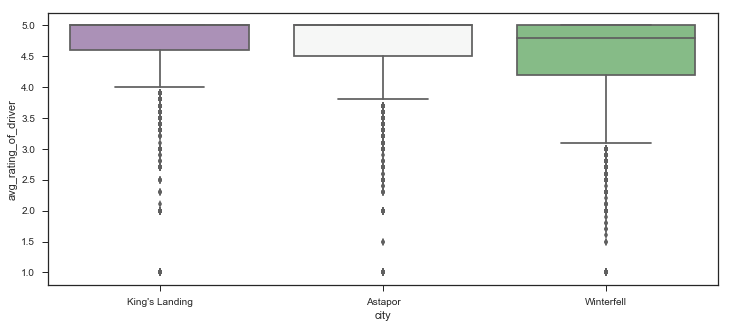

In [522]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
sns.boxplot(y=df_citystats["avg_rating_of_driver"],x="city", data=df_citystats, palette="PRGn");

In [525]:
df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [531]:
dates = df[['last_trip_date','signup_date']]
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
last_trip_date    50000 non-null object
signup_date       50000 non-null object
dtypes: object(2)
memory usage: 781.3+ KB


In [533]:
dates['last_trip']= pd.to_datetime(df['last_trip_date'])
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
last_trip_date    50000 non-null object
signup_date       50000 non-null object
last_trip         50000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.1+ MB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [534]:
dates.describe()

,last_trip_date,signup_date,last_trip
count,50000,50000,50000
unique,182,31,182
top,2014-06-29,2014-01-18,2014-06-29 00:00:00
freq,2036,2948,2036
first,NaN,NaN,2014-01-01 00:00:00
last,NaN,NaN,2014-07-01 00:00:00


No Missing last ride trips

In [535]:
sum(pd.isnull(dates['last_trip_date']))

0

In [536]:
count_last = dates['last_trip'].value_counts()
count_last.head()

2014-06-29    2036
2014-06-28    1679
2014-06-30    1408
2014-06-27    1120
2014-06-22    1024
Name: last_trip, dtype: int64

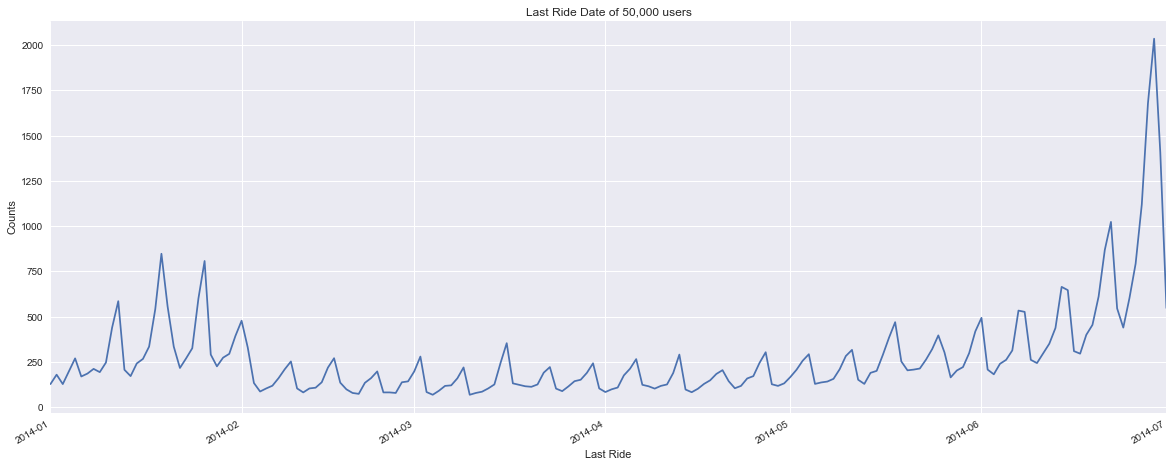

In [589]:
sns.set()
plt.xlabel('Last Ride')
plt.ylabel('Counts')
plt.title('Last Ride Date of 50,000 users')

count_last.plot(figsize=(20,8));

### Get a count/label of active users

Convert last trip date to date time

In [647]:
df['last_trip']= pd.to_datetime(df['last_trip_date'])

Set a cut off date for 30 previous to end of data 

In [648]:
last_date = (pd.to_datetime('2014-07-01')- pd.Timedelta('30D'))
last_date

Timestamp('2014-06-01 00:00:00')

identify active users who used service in last 30 days

In [649]:
df['active_user'] = [0 if x < last_date else 1 for x in df['last_trip']]

In [583]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip,active_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15,0


In [628]:
print("There are ", df['active_user'].sum(), " active users (last 30 days).")

There are  18804  active users (last 30 days).


In [629]:
print( round(df['active_user'].sum()/len(df)*100,2), "% were still active over 6 months.")

37.61 % were still active over 6 months.


### Compare the Active, Inactive users of the last 30 days against the total signups in January

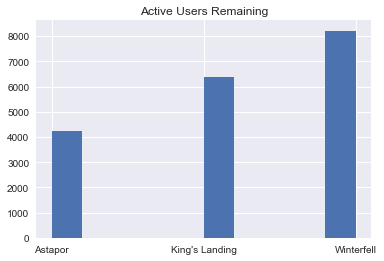

In [687]:
plt.title('Active Users Remaining')
bar_width = 0.35
plt.hist(df[df['active_user']==1]['city']);

In [657]:
#create an inactive count field
df['inactive_user']= [0 if x == 1 else 1 for x in df['active_user']]

In [658]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip,active_user,inactive_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15,0,1


Create a dataframe of the Active, Inactive and Totals

In [701]:
df2 = df[['city','active_user','inactive_user']]
df2['signups'] = df2['active_user']+df2['inactive_user']
df3 = df2.groupby('city').sum().reset_index()
df3['percent_change'] = round(df3['inactive_user'] / df3['signups'],2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [702]:
df3.head(20)

,city,active_user,inactive_user,signups,percent_change
0,Astapor,4228,12306,16534,0.74
1,King's Landing,6363,3767,10130,0.37
2,Winterfell,8213,15123,23336,0.65


Plotting out the totals illustrates the 65% and 75% drop in Winterfell and Astapor respectively. King's Landing has had the smallest drop.

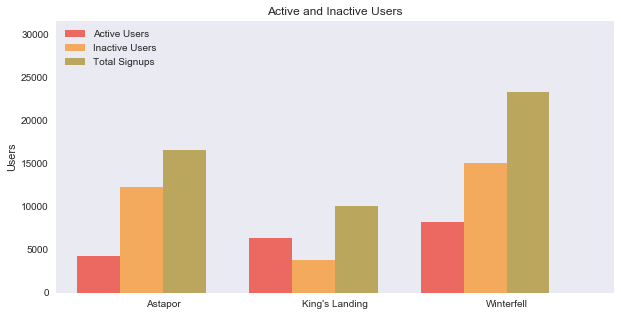

In [705]:
# Setting the positions and width for the bars
pos = list(range(len(df3['active_user'])))
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with active user data,
# in position pos,
plt.bar(pos, df3['active_user'],#using  active user data,
        width,     
        alpha=0.7, # with alpha 0.7
        color='#EE3224', 
        label=df3['city'][0]) # with label value in city column 

# Create a bar with inactive user data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], df3['inactive_user'], #using inactive user data,
        width, 
        alpha=0.7, 
        color='#F78F1E', 
        label=df3['city'][1])  # with label value in city column

# Create a bar with total signups data,
# in position pos + some width buffer,
plt.bar([p + 2*width for p in pos], df3['signups'], #signups data
        width, 
        alpha=0.7, 
        color='#A78A1E', 
        label=df3['city'][2]) # with label value in city column

# Set the y axis label
ax.set_ylabel('Users')

# Set the chart's title
ax.set_title('Active and Inactive Users')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df3['city'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df3['active_user'] +df3['signups'])] )

# Adding the legend and showing the plot
plt.legend(['Active Users', 'Inactive Users','Total Signups'], loc='upper left')
plt.grid();

---

King's Landing has the highest rated drivers by both active and inactive users

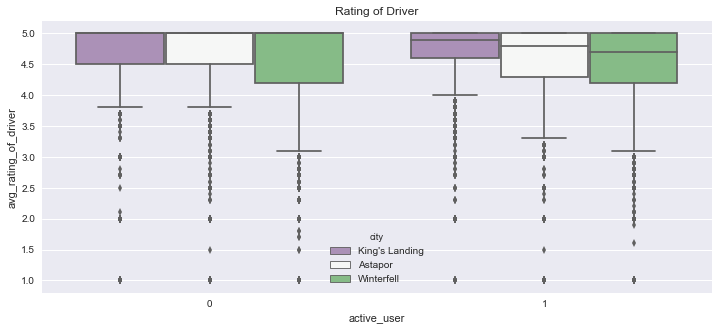

In [706]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
plt.title("Rating of Driver")
sns.boxplot(y=df["avg_rating_of_driver"],x="active_user", hue='city', data=df, palette="PRGn");

King's Landing has the highest rated passengers by both active and inactive users

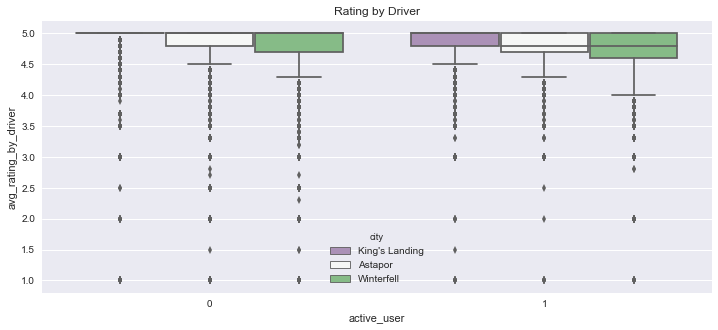

In [709]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
plt.title("Rating by Driver")
sns.boxplot(y=df["avg_rating_by_driver"],x="active_user", hue='city', data=df, palette="PRGn");

High surge exposure percent seems to be similar accross both inactive and active users

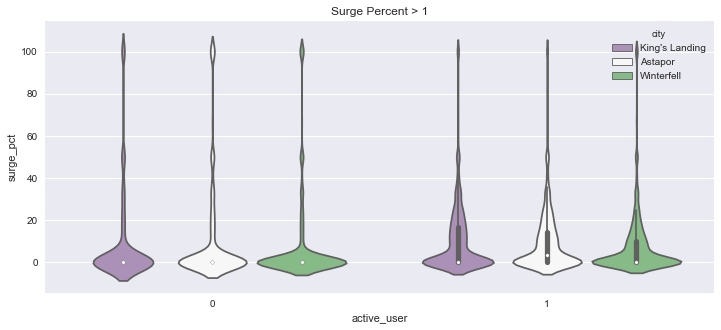

In [711]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
plt.title("Surge Percent > 1")
sns.violinplot(y=df["surge_pct"],x="active_user",hue='city', data=df, palette="PRGn");

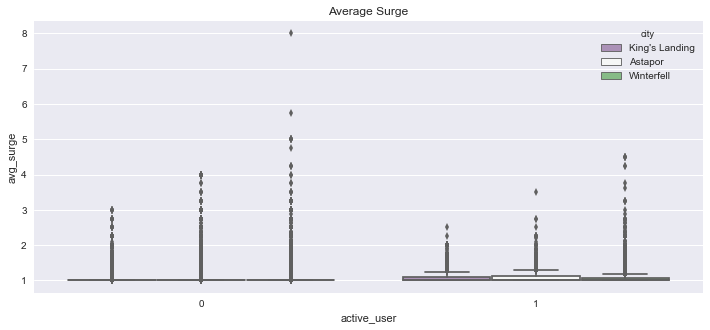

In [712]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)
plt.title("Average Surge")
sns.boxplot(y=df["avg_surge"],x="active_user",hue='city', data=df, palette="PRGn");

### Lets see what determines whether a user stays active 5 months.

Will start by removing missing values:

In [609]:
df[['phone','avg_rating_of_driver','avg_rating_by_driver']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
phone                   49604 non-null object
avg_rating_of_driver    41878 non-null float64
avg_rating_by_driver    49799 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [759]:
df = df.dropna()

In [613]:
df.shape

(41445, 14)

The features of city, phone and ulitmate black user are categorical variables for tranformation:

In [760]:
df['ultimate_black'] = [1 if x == True else 0 for x in df['ultimate_black_user']]

In [761]:
df['phone_type'] = [1 if x == 'iPhone' else 0 for x in df['phone']]

In [762]:
df_city = pd.get_dummies(df['city'])

In [763]:
df_model = pd.concat([df,df_city],axis=1)

In [764]:
df_model.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip,active_user,inactive_user,ultimate_black,phone_type,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17,1,0,1,1,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07,0,1,0,1,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29,1,0,1,1,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15,0,1,0,0,0,0,1


In [765]:
df_model.drop(['city','phone','last_trip_date','signup_date','ultimate_black_user','last_trip','inactive_user',"King's Landing"],axis=1,inplace=True)

In [766]:
df_model.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,active_user,ultimate_black,phone_type,Astapor,Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,1,0,0
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,1,0,0
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,0,1


In [767]:
df_model.drop([],axis=1,inplace=True)

Split into labels and features datasets

In [768]:
labels = df_model['active_user']

In [769]:
features = df_model.drop('active_user',axis=1)

In [771]:
features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,ultimate_black,phone_type,Astapor,Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,1,0,0
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,1,0,0
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,0,1


Import many models

In [810]:
import scipy.ndimage 
import xgboost as xg
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline, Pipeline

In [788]:
class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            #sm = SMOTE(ratio = 'auto', random_state=123)
            model = self.models[key]
            params = self.params[key]
            #pipeline = Pipeline([('sm',sm), ('model',model)]) #create a PIPELINE to apply SMOTE
            pipeline = Pipeline([('model',model)])
            kf = StratifiedKFold(n_splits=10)
            gs = GridSearchCV(pipeline, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs    
    
    def score_summary(self, sort_by='min_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores)
                 #'std_score': std(scores)
            }
            return pd.Series({**params,**d}) 
                      
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                     for k in self.keys
                     for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False) 
        
        columns = ['estimator', 'min_score', 'max_score'] 
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [790]:
models1 = { 
    
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': xg.XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNClassifier': KNeighborsClassifier(),
    'BaggingClassifer': BaggingClassifier(),
    'LogisticRegression':LogisticRegression(),

}

params1 = { 
    'RandomForestClassifier': { "model__n_estimators": [10, 18, 22, 30],
              "model__max_depth": [3, 5],
              "model__min_samples_split": [15, 20],
              "model__min_samples_leaf": [5, 10, 20], },
    
    'AdaBoostClassifier':  { "model__n_estimators": [10, 18, 22, 30],
                            },
              
    'XGBClassifier': { 'model__n_estimators': [1000],
                      'model__learning_rate': [1.0],
                      'model__max_depth':range(3,10,2),
                      'model__min_child_weight':range(1,6,2) 
                     },
    
    'DecisionTree': {'model__min_samples_split': [7, 15, 20],
                    },
    
    'KNClassifier': {'model__n_neighbors':[3,5,7]
                    },
    
    'BaggingClassifer': {'model__n_estimators':[6,9,12],},
    
    'LogisticRegression': {'model__C':[0.1,1,10],},

}

In [791]:
recall_scorer = make_scorer(recall_score, pos_label=1)

In [775]:
#splitting into features and target
y = labels
X = features

In [778]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [779]:
X_train= X_train.as_matrix()
X_test= X_test.as_matrix()

In [792]:
helper = EstimatorSelectionHelper(models1, params1)
helper.fit(X_train, y_train, scoring=recall_scorer, n_jobs=-1)

Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   20.8s finished


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   14.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.3s finished


Running GridSearchCV for XGBClassifier.
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.4min finished


Running GridSearchCV for DecisionTree.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    7.3s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   14.5s finished


Running GridSearchCV for KNClassifier.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    8.2s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   15.2s finished


Running GridSearchCV for BaggingClassifer.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    8.7s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   16.0s finished


Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    8.4s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   15.6s finished


In [797]:
helper.score_summary(sort_by='max_score').head(20) #Recall score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_

,estimator,min_score,max_score,mean_score,model__C,model__learning_rate,model__max_depth,model__min_child_weight,model__min_samples_leaf,model__min_samples_split,model__n_estimators,model__n_neighbors
49,AdaBoostClassifier,0.676011,0.693034,0.684211,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
50,AdaBoostClassifier,0.67247,0.687426,0.6788,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN
51,AdaBoostClassifier,0.67424,0.682704,0.679883,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN
48,AdaBoostClassifier,0.660567,0.681818,0.672897,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
55,XGBClassifier,0.6527,0.681818,0.665717,NaN,1,5,1,NaN,NaN,1000,NaN
52,XGBClassifier,0.647094,0.680342,0.664734,NaN,1,3,1,NaN,NaN,1000,NaN
54,XGBClassifier,0.656241,0.679752,0.666799,NaN,1,3,5,NaN,NaN,1000,NaN
71,BaggingClassifer,0.650044,0.676505,0.666111,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN
58,XGBClassifier,0.646798,0.67562,0.66375,NaN,1,7,1,NaN,NaN,1000,NaN
62,XGBClassifier,0.645618,0.67503,0.662274,NaN,1,9,3,NaN,NaN,1000,NaN


#### Lets see how details of the top rated classifier, AdaBoost and its parameters,  AUC and best variables

In [845]:
model = AdaBoostClassifier(n_estimators=18)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [846]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7988 1720]
 [2162 4708]]
             precision    recall  f1-score   support

          0       0.79      0.82      0.80      9708
          1       0.73      0.69      0.71      6870

avg / total       0.76      0.77      0.76     16578



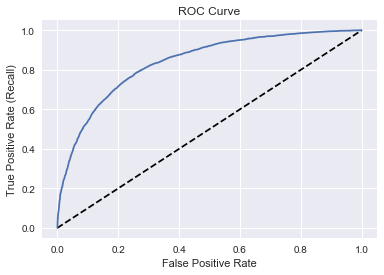

In [847]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: 
# false positive rate
# true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

In [848]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(model, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.838553258795849
AUC scores computed using 5-fold cross-validation: [ 0.83645664  0.83772196  0.83309106  0.84009564  0.84404743]


In [851]:
model.feature_importances_

array([ 0.05555556,  0.16666667,  0.05555556,  0.        ,  0.11111111,
        0.05555556,  0.16666667,  0.05555556,  0.05555556,  0.16666667,
        0.11111111])

####  Which features were most important?

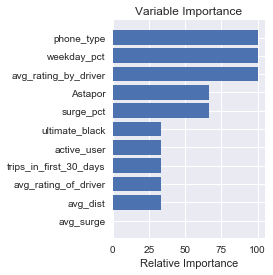

In [854]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_model.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Lets see how details of the 2nd rated classifier, XGBoost, and its AUC and best variables

In [857]:
model = xg.XGBClassifier(learning_rate = 1, max_depth=5, min_child_weight= 1, n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [858]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7700 2008]
 [2278 4592]]
             precision    recall  f1-score   support

          0       0.77      0.79      0.78      9708
          1       0.70      0.67      0.68      6870

avg / total       0.74      0.74      0.74     16578



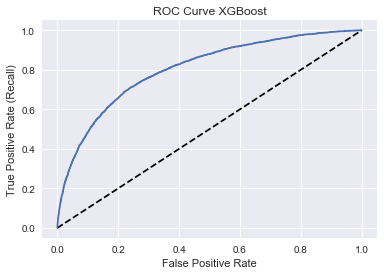

In [863]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: 
# false positive rate
# true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve XGBoost')
plt.show()

In [860]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(model, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8040155735241991
AUC scores computed using 5-fold cross-validation: [ 0.80456264  0.804526    0.79853263  0.80591772  0.80819807]


####  Which features were most important?

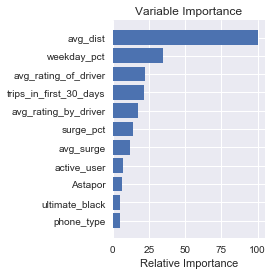

In [861]:
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_model.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Conclusion and Recommendations

The strongest model with the highest True Positives was Adaptive Boost with Extreme Gradient Boost coming second based on average True Positive scores. The strongest features selected from both were
- Phone type
- Weekday Percent
- Average Rating per driver


### Phone Type
My recommendations would be to investigate the design of both phones types to make sure they both deliverable a good and consistent UI experience. 

### Weekday Percent
Offer encouragements/incentives to non-high percent weekday users to create a more familiar, almost daily, relationship with the platform.

### Average Rating of Driver
Higher driver rating equates to higher retension. Incentivize the drivers with education and additional perks to aim to get and maintain a higher rating. 